In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"

In [3]:
data = pd.read_csv(r"C:\Users\Mahsa\Desktop\base\energy poverty\Residential total final consumption (TFC) by source - Islamic Republic of Iran.csv",
                   skiprows=3)
data.rename(columns={
    "Unnamed: 0" : "year"
}, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                33 non-null     int64  
 1   Oil products        33 non-null     int64  
 2   Natural gas         33 non-null     int64  
 3   Biofuels and waste  33 non-null     int64  
 4   Electricity         33 non-null     int64  
 5   Coal                30 non-null     float64
 6   Units               33 non-null     object 
dtypes: float64(1), int64(5), object(1)
memory usage: 1.9+ KB


In [19]:
data.head()

,year,Oil products,Natural gas,Biofuels and waste,Electricity,Coal,Units
0,1990,350837,109286,3526,62438,NaN,TJ
1,1991,369349,157915,3777,68860,NaN,TJ
2,1992,425104,245763,4402,70232,NaN,TJ
3,1993,407478,269018,4928,79714,774.0,TJ
4,1994,490043,343683,5500,80902,774.0,TJ


In [20]:
data.columns

Index(['year', 'Oil products', 'Natural gas', 'Biofuels and waste',
       'Electricity', 'Coal', 'Units'],
      dtype='object')

In [4]:
data.dropna(inplace = True)

In [5]:
cols = ['Oil products', 'Natural gas', 'Biofuels and waste', 'Electricity', 'Coal']

# Calculate row totals for just these columns
row_totals = data[cols].sum(axis=1)

# Divide each column by the row total
data[cols] = (data[cols].div(row_totals, axis=0))*100

In [23]:
data.head()

,year,Oil products,Natural gas,Biofuels and waste,Electricity,Coal,Units
3,1993,53.480979,35.308277,0.646794,10.462363,0.101587,TJ
4,1994,53.213371,37.320258,0.597241,8.785082,0.084048,TJ
5,1995,50.411096,40.354146,0.539800,8.615708,0.079250,TJ
6,1996,47.381638,43.665891,0.538724,8.339021,0.074726,TJ
7,1997,44.751484,46.106714,0.423696,8.648003,0.070103,TJ


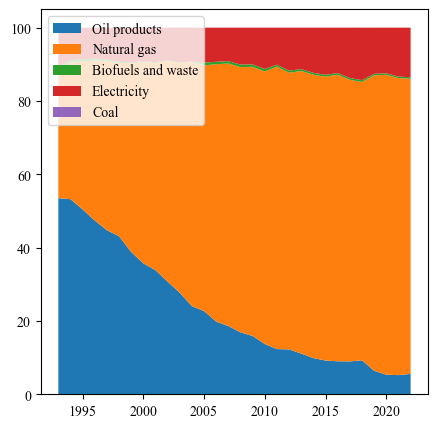

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))

ax.stackplot(data["year"], data[cols].T, labels=cols)

ax.legend(loc='upper left')
plt.show()

In [33]:
data.loc[data["year"]==2022]

,year,Oil products,Natural gas,Biofuels and waste,Electricity,Coal,Units
32,2022,5.552253,80.499857,0.40398,13.530631,0.013278,TJ


# Working on HIES

In [6]:
data = pd.read_pickle("merged")
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 582542 entries, 0 to 582542
Columns: 113 entries, HHID to energy_Ratio
dtypes: float64(98), object(15)
memory usage: 506.7+ MB


In [18]:
def weighted_describe(values, weights):
    values = np.asarray(values)
    weights = np.asarray(weights)

    # Drop NaNs
    mask = ~np.isnan(values)
    values = values[mask]
    weights = weights[mask]

    # Weighted count
    count = weights.sum()

    # Weighted mean
    mean = np.average(values, weights=weights)

    # Weighted variance and std
    variance = np.average((values - mean) ** 2, weights=weights)
    std = np.sqrt(variance)

    # Weighted min and max
    min_val = values.min()
    max_val = values.max()

    # Weighted percentiles
    def weighted_percentile(data, weights, percent):
        """Compute weighted percentile (percent between 0-100)."""
        sorter = np.argsort(data)
        data, weights = data[sorter], weights[sorter]
        cdf = np.cumsum(weights) / weights.sum()
        return np.interp(percent / 100, cdf, data)

    q25 = weighted_percentile(values, weights, 25)
    q50 = weighted_percentile(values, weights, 50)  # median
    q75 = weighted_percentile(values, weights, 75)

    return pd.Series({
        "count": count,
        "mean": mean,
        "std": std,
        "min": min_val,
        "25%": q25,
        "50%": q50,
        "75%": q75,
        "max": max_val
    })


In [22]:
df = data.loc[(data["Tenure"]=="Rented")&(data["year"]==1402)&(data["region"]=="Urban")]
df["HouseExpRatio"] = 100*((df["RentExp"]+df["EstRentExp"])/df["all_expenditure"])
weighted_describe(df["HouseExpRatio"], weights= df["weight"])

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_12548\1825656094.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["HouseExpRatio"] = 100*((df["RentExp"]+df["EstRentExp"])/df["all_expenditure"])


count    3.353776e+06
mean     3.194073e+01
std      1.230234e+01
min      1.000032e+00
25%      2.393064e+01
50%      3.071063e+01
75%      3.983277e+01
max      1.000000e+02
dtype: float64

In [23]:
data = data[['HHID',
'region',
'quarter',
'weight',
'county_code',
'province_code',
'HHsize',
'NumChild_U5',
'NumChild_B5_7',
'NumChild_B7_18',
'NumChildOver18',
'HeadWoman',
'NumEmployed',
'NumOld',
'NumMale',
'Tenure',
'Room',
'Area',
'Skeleton',
'MainMaterial',
'PrivateVehicle',
'Motorcycle',
'Bike',
'Radio',
'Cassette',
'TVbw',
'TV',
'VideoPlayer',
'Computer',
'Cellphone',
'Freezer',
'Refrigerator',
'Freez_refrig',
'Vacuum',
'Washer',
'Sewing',
'Fan',
'Cooler_water_portable',
'Cooler_gas_portable',
'Dishwasher',
'None',
'Pipewater',
'Electricity',
'Pipegas',
'Phone',
'Internet',
'Bathroom',
'Kitchen',
'Cooler_water',
'Centralcooler',
'Centralheat',
'Pakage',
'Cooler_gas',
'Sewer_network',
'Cookfuel',
'Heatfuel',
'Hotwaterfuel',
'FoodExp',
'ElectricityExp',
'ElectricityOtherExp',
'NaturalGasExp',
'NaturalGasOtherExp',
'OtherEnergyReExp',
'year',
'all_expenditure',
'all_energy_EXP',
'energy_Ratio']]

In [24]:
data = data.loc[data["FoodExp"]!= 0]
data.isna().sum()

HHID                0
region              0
quarter             0
weight              0
county_code         0
                   ..
OtherEnergyReExp    0
year                0
all_expenditure     0
all_energy_EXP      0
energy_Ratio        0
Length: 67, dtype: int64

In [25]:
data["year"] = np.where(
    data["year"] == 1403, 2024, np.where(
        data["year"] == 1402, 2023, np.where(
            data["year"] == 1401, 2022, np.where(
                data["year"] == 1400, 2021, np.where(
                    data["year"] == 99, 2020, np.where(
                        data["year"] == 98, 2019, np.where(
                            data["year"] == 97, 2018, np.where(
                                data["year"] == 96, 2017, np.where(
                                    data["year"] == 95, 2016, np.where(
                                        data["year"] == 94, 2015, np.where(
                                            data["year"] == 93, 2014, np.where(
                                                data["year"] == 92, 2013, np.where(
                                                    data["year"] == 91, 2012, np.where(
                                                        data["year"] == 90, 2011, np.where(
                                                            data["year"] == 89, 2010, pd.NA
                                                        )
                                                    )
                                                )
                                            )
                                        )
                                    )
                                )
                            )
                        )
                    )
                )
            )
        )
    )
)

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_13884\436222094.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(groups, labels=data["year"].unique(), vert=False, flierprops=flierprops)


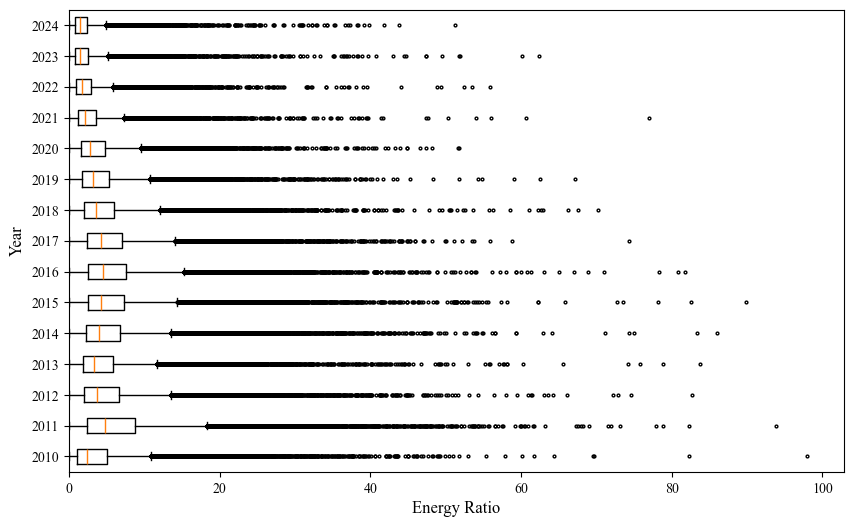

In [6]:
# Group by year
groups = [data.loc[data["year"] == y, "energy_Ratio"] for y in data["year"].unique()]

fig, ax = plt.subplots(figsize=(10, 6))

# Horizontal boxplot
flierprops = dict(marker='o', markersize=2, linestyle='none')
ax.boxplot(groups, labels=data["year"].unique(), vert=False, flierprops=flierprops)

# Labels with Times New Roman font
ax.set_xlabel("Energy Ratio", fontname="Times New Roman", fontsize=12)
ax.set_ylabel("Year", fontname="Times New Roman", fontsize=12)

# Change tick labels font to Times New Roman
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontname("Times New Roman")
plt.xlim(0,)
plt.show()


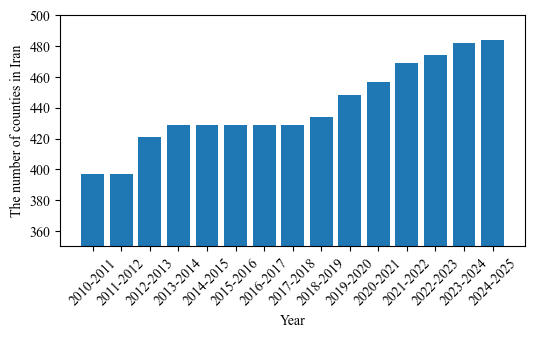

In [35]:
list_ofColumns = [
    "2010-2011",
    "2011-2012",
    "2012-2013",
    "2013-2014",
    "2014-2015",
    "2015-2016",
    "2016-2017",
    "2017-2018",
    "2018-2019",
    "2019-2020",
    "2020-2021",
    "2021-2022",
    "2022-2023",
    "2023-2024",
    "2024-2025"
]
num_counties = [
    397,397,421,429,429,429,429,429,434,448,457,469,474,482,484
]

plt.figure(figsize=(6, 3))
plt.bar(list_ofColumns, num_counties)
plt.ylim(350, 500)
plt.xticks(fontsize=10, rotation = 45)
plt.yticks(fontsize=10)
plt.xlabel("Year", fontsize = 10)
plt.ylabel("The number of counties in Iran", fontsize = 10)
plt.show()

In [37]:
import sklearn
